# Abalone Age prediction

### Project Description

### Importing supporting libraries

In [60]:
import pandas as pd
import numpy as np

### Importing dataset

In [61]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='CqtnJLeKSb1op-Wbxkj4O-1T_CcK3v3TwPMnxSxN-Z8j',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'abalone-donotdelete-pr-qzkuw074kwyete'
object_key = 'abalone.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Checking filesize

In [62]:
df.shape

(4177, 9)

### Checking file info

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Checking for null values in the dataset

In [64]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Checking statistical summary

In [65]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000



### Introducing new attribute age by adding rings +1.5

In [66]:
df['age'] = df.Rings + 1.5
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


### Droping rings column

In [67]:
df.drop(columns=['Rings'],axis=1,inplace=True)

In [68]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


### Categorical feature analysis

In [69]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

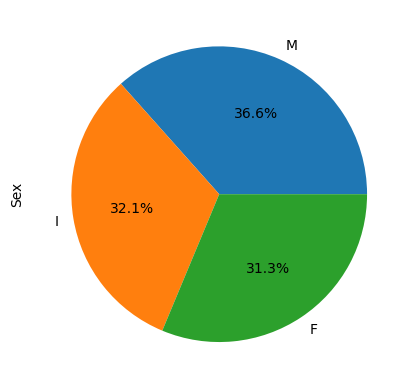

In [70]:
# Ploting categorical features with the help of a pie chart
df.Sex.value_counts().plot(kind='pie',autopct='%1.1f%%',)

In [71]:
# Encoding sex column for ML purpose
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Sex=le.fit_transform(df.Sex)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


### Distribution plot for all features

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

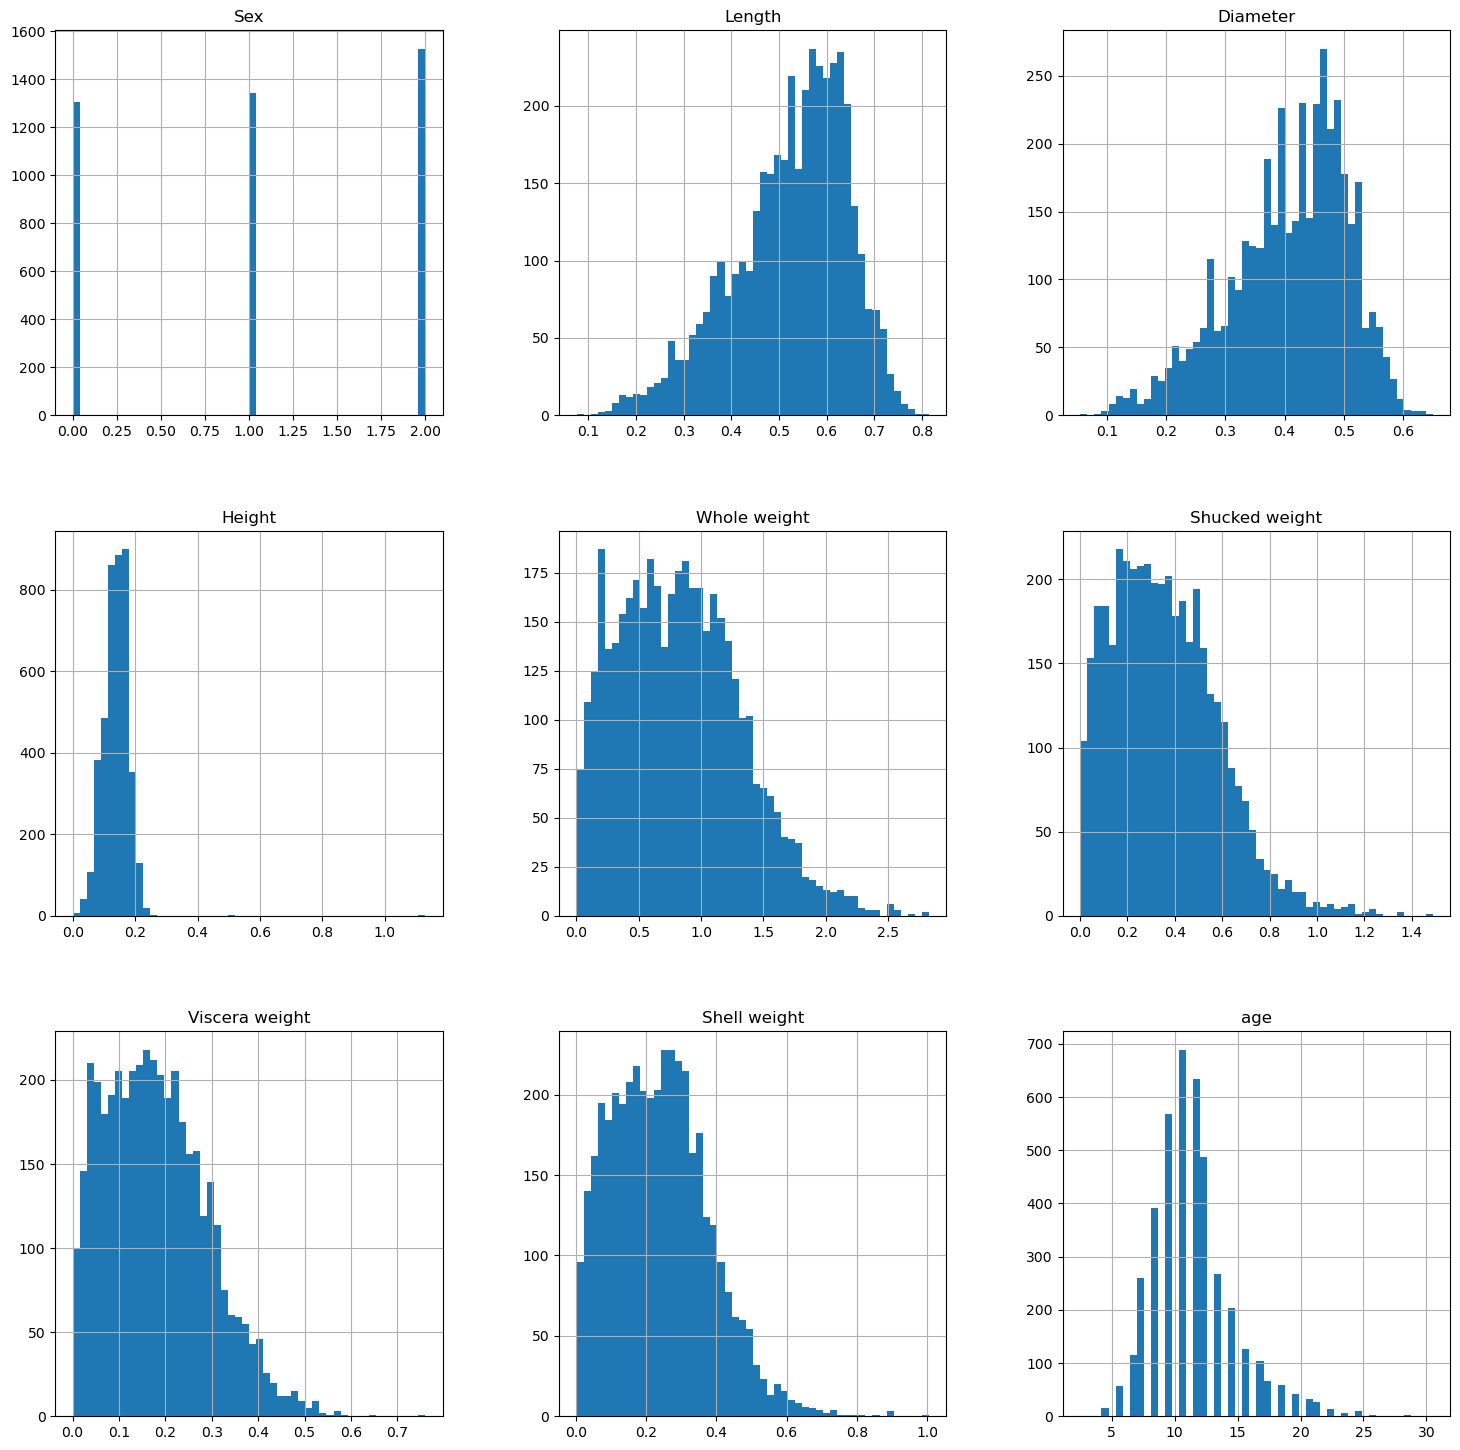

In [72]:
import seaborn as sns
df.hist(bins=50, figsize=(18,18))

### Checking Age distribution graph, as it is our target

<AxesSubplot:xlabel='age', ylabel='Density'>

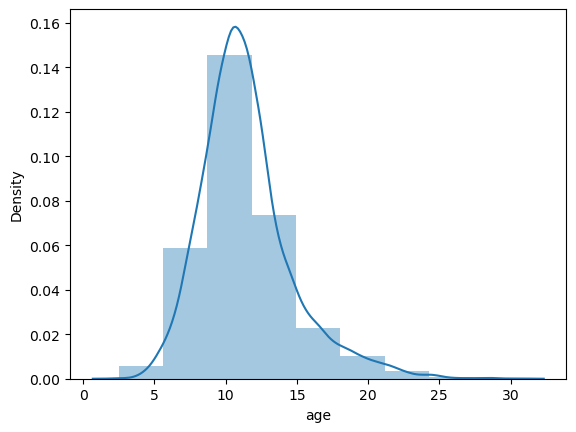

In [73]:
sns.distplot(df.age,bins=9)

### Pairplot-Bivariate analysis

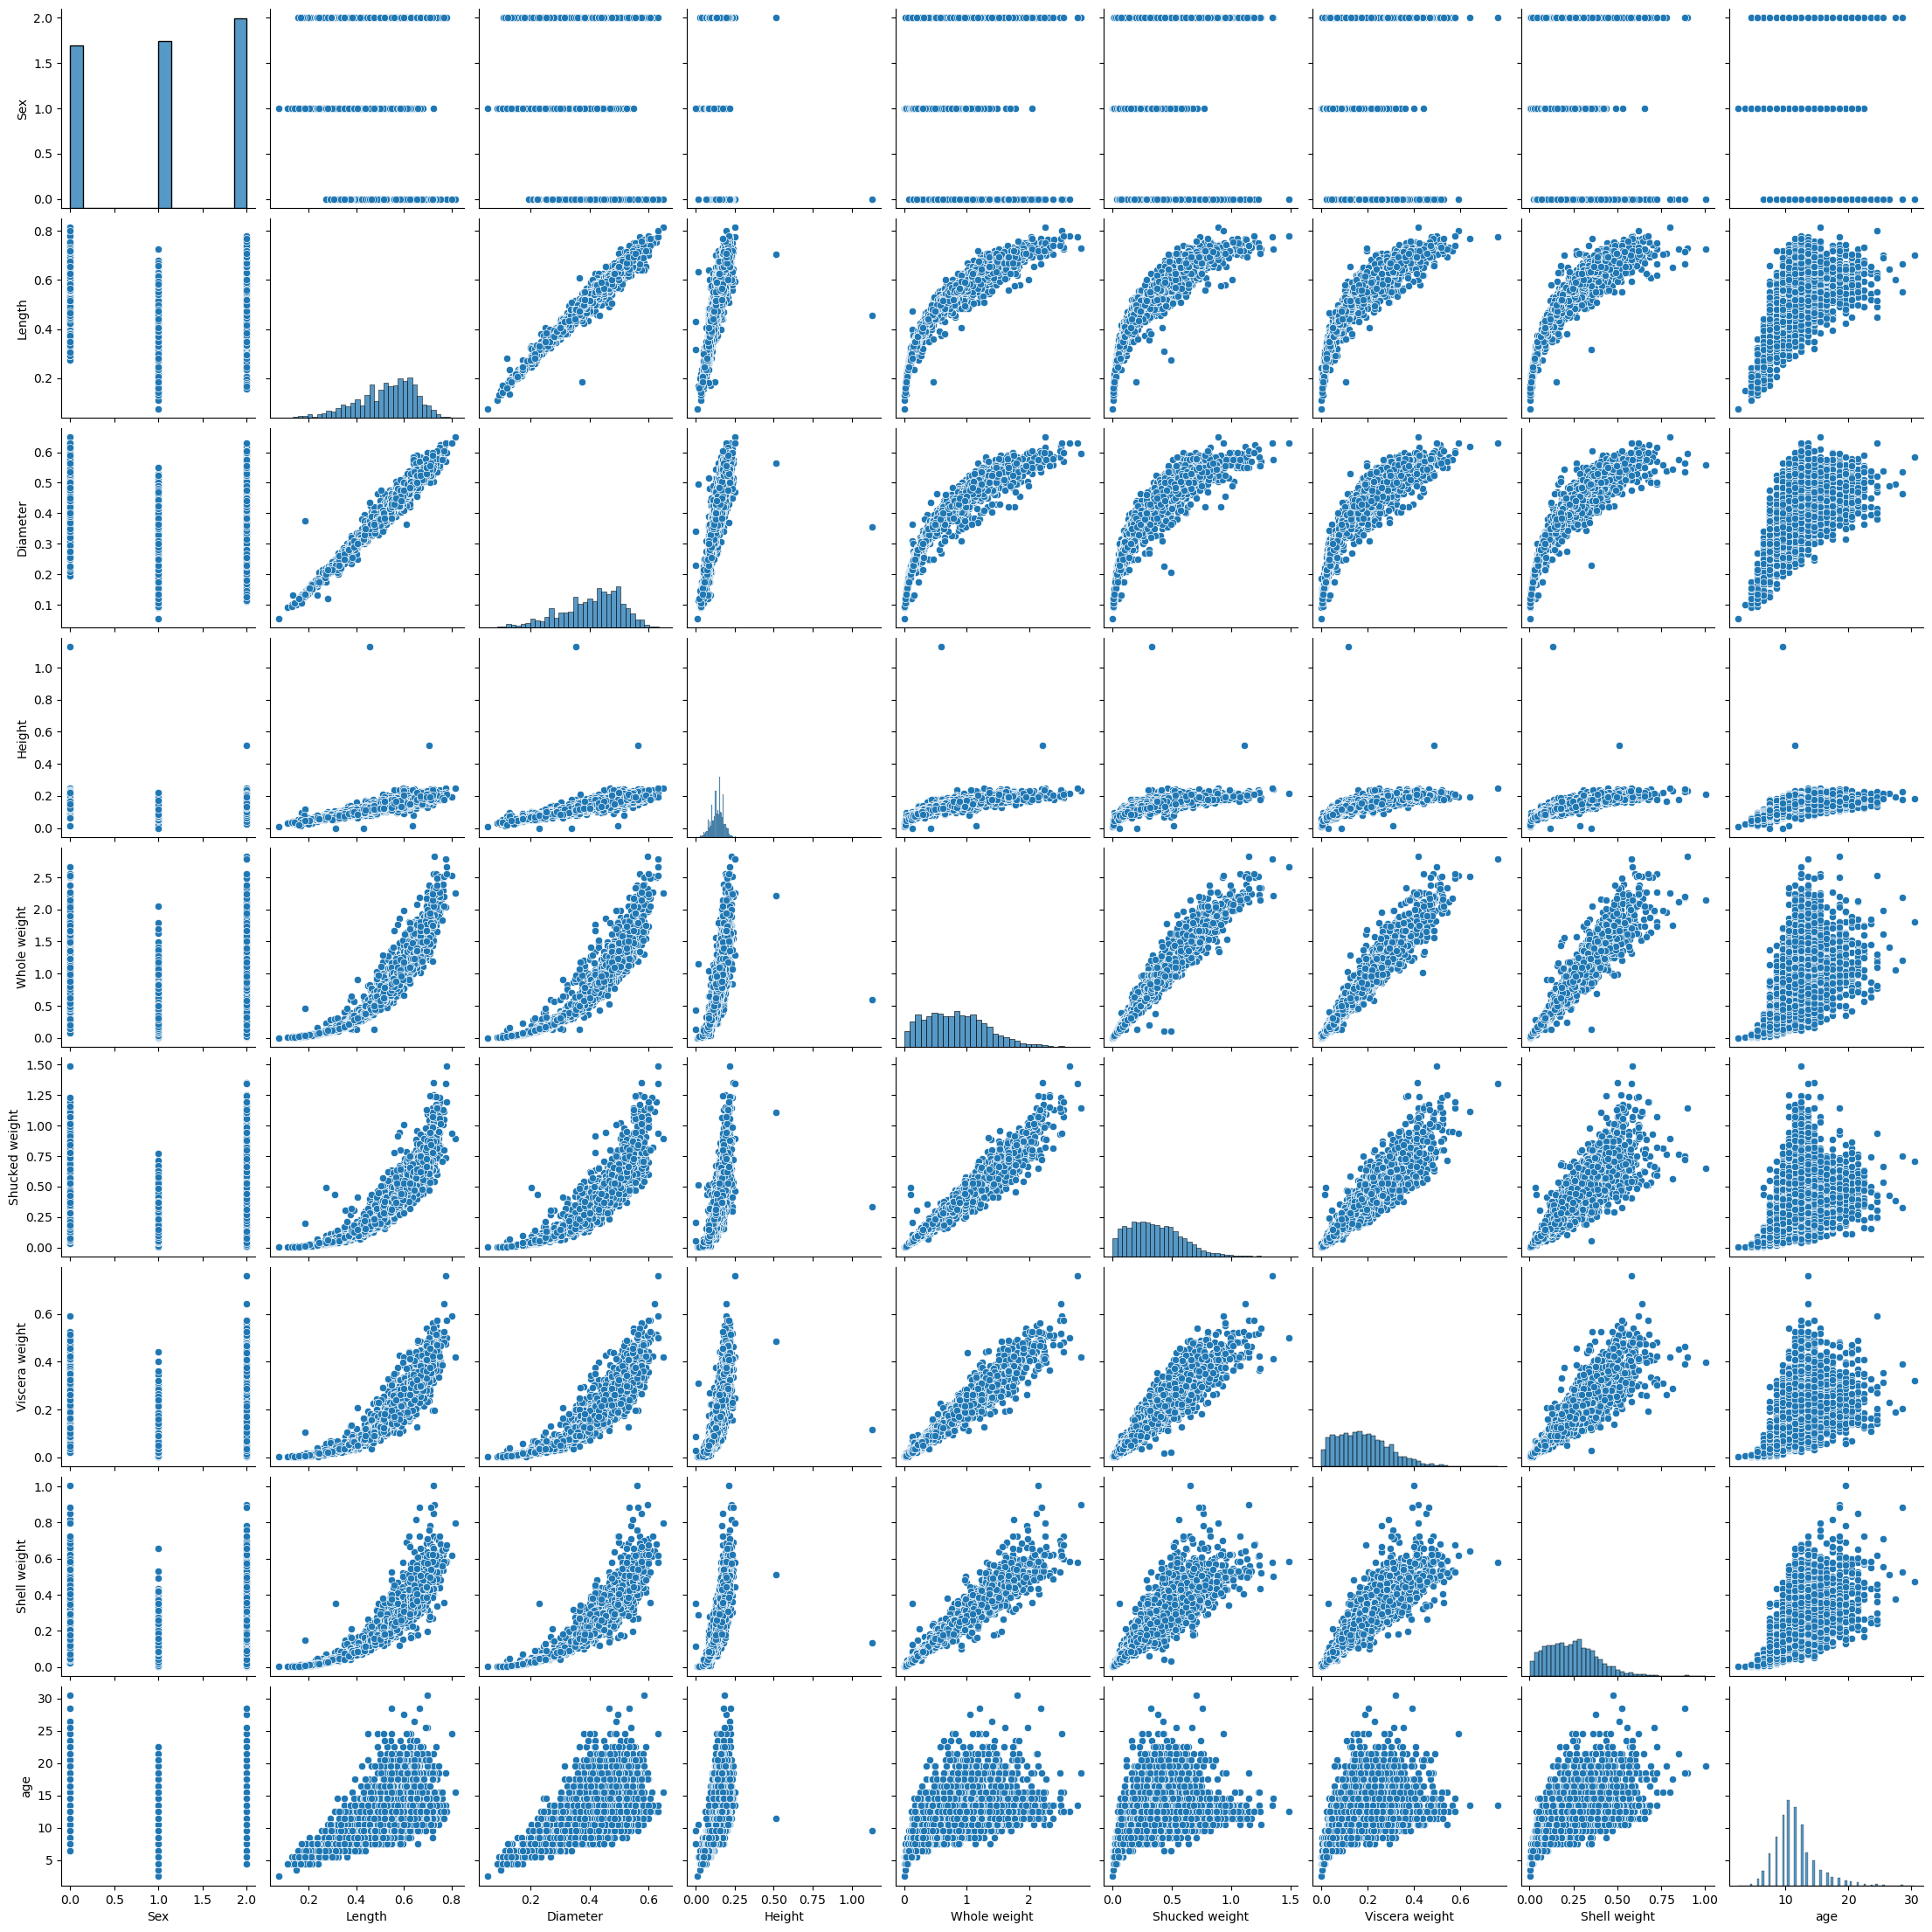

In [74]:
sns.pairplot(df)

### Checking feature's correlation with target

In [75]:
corre=df.corr().age.sort_values(ascending=False)
corre

age               1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: age, dtype: float64

### Correlation Graph

<AxesSubplot:>

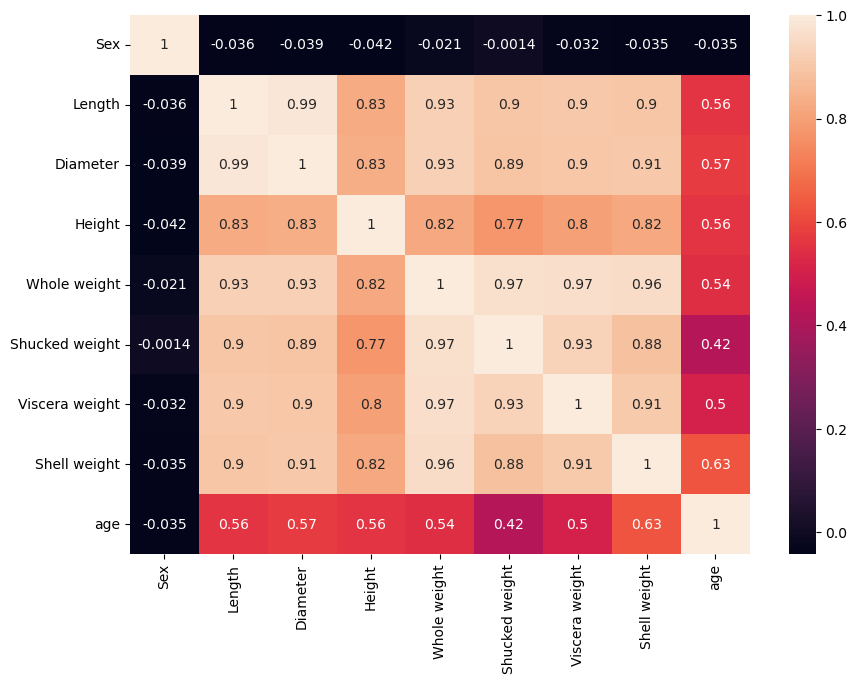

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

### Checking Outliers in features

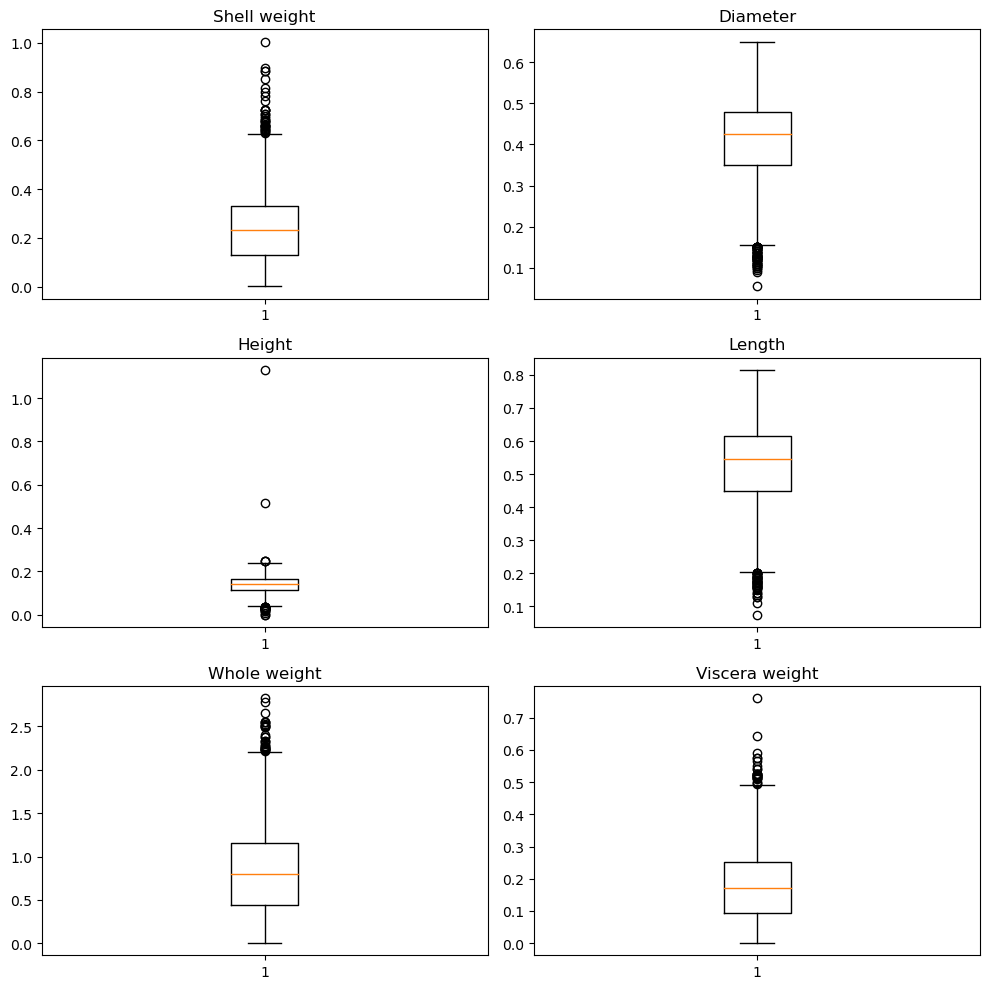

In [77]:
# outlier checking
fig, ax = plt.subplots(3, 2,figsize=(10,10))

ax[0, 0].boxplot(df['Shell weight'])
ax[0, 1].boxplot(df.Diameter)
ax[1, 0].boxplot(df.Height)
ax[1, 1].boxplot(df.Length)
ax[2, 0].boxplot(df['Whole weight'])
ax[2, 1].boxplot(df['Viscera weight'])


ax[0, 0].set_title("Shell weight")
ax[0, 1].set_title("Diameter")
ax[1, 0].set_title("Height")
ax[1, 1].set_title("Length")
ax[2, 0].set_title("Whole weight")
ax[2, 1].set_title("Viscera weight")


fig.tight_layout()
plt.show()

### splitting independant variable X and dependant variable y

In [78]:
X=df.iloc[:,:-1]
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [79]:
y=df.age
y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: age, dtype: float64

### Scaling

In [80]:
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame (scale(X), columns=X.columns)
X_scaled.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757


### train test split

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [82]:
X_train.shape

(2923, 8)

In [83]:
y_train.shape

(2923,)

In [84]:
X_test.shape

(1254, 8)

In [85]:
y_test.shape

(1254,)

## Machine Learning Modeling 

## 1.Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [87]:
y_predict1=model1.predict(X_test)

In [88]:
from sklearn.metrics import r2_score
test_score=r2_score(y_test, y_predict1)
test_score

0.5076597579882232

In [89]:
train_score=model1.score(X_train,y_train)
train_score

0.5350260405534439

In [90]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predict1))
print('MSE:', metrics.mean_squared_error(y_test,y_predict1 ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict1)))

MAE: 1.6084225761959117
MSE: 4.9506400645640305
RMSE: 2.2250033852927125


### Checking the accuracy btw actual & predicted ages

In [91]:
lr_age= pd.DataFrame({'Actual_age':y_test,'Predicted_age':y_predict1})
lr_age.head()

,Actual_age,Predicted_age
17,11.5,9.999774
1131,9.5,8.572794
299,10.5,9.337516
1338,11.5,10.603488
2383,17.5,11.765964


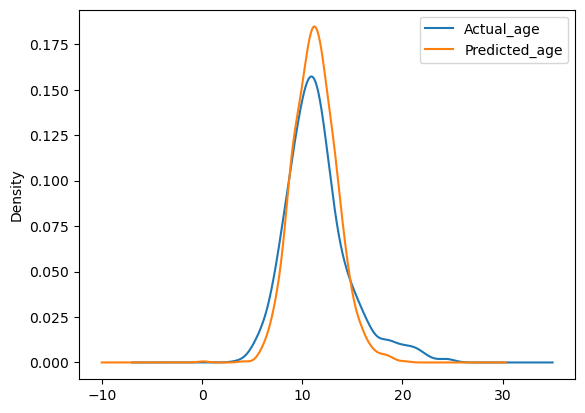

In [92]:
# Density plot for lr

lr_reg = lr_age.plot.kde()

## 2.Random ForestRegressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators=100,random_state=0)
model2.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [94]:
y_predict2 = model2.predict(X_test)
rf=r2_score(y_test, y_predict2)
rf

0.544837211143123

In [95]:
training_score=model2.score(X_train,y_train)
training_score

0.9347162379789299

In [96]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict2))
print('MSE:', metrics.mean_squared_error(y_test,y_predict2 ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict2)))

MAE: 1.5211483253588516
MSE: 4.576808771929825
RMSE: 2.1393477445076163


In [97]:
rf_age= pd.DataFrame({'Actual_age':y_test,'Predicted_age':y_predict2})
rf_age.head()

,Actual_age,Predicted_age
17,11.5,11.96
1131,9.5,10.47
299,10.5,10.19
1338,11.5,10.10
2383,17.5,12.92


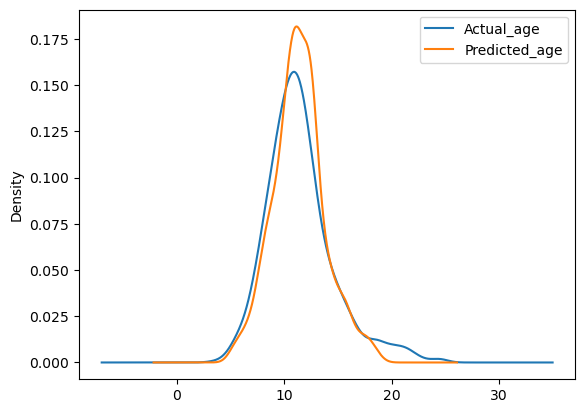

In [98]:
# Density plot for lr

lr_reg = rf_age.plot.kde()

In [99]:
import pickle
pickle.dump(model1, open('abalone1.pkl','wb'))

In [100]:
!pip install watson-machine-learning-client --upgrade

In [109]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "vfWNCWk2Ox12sD7ZvlRkoIg4tN14kgBs_sOVB8qGjm7v"
}
client = APIClient(wml_credentials)

In [110]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [111]:
space_uid = guid_from_space_name(client, space_name='newdeployement')
print("Space UID = " + space_uid)

Space UID = 603668cc-4d6c-4442-b188-cf08b5fd509c


In [112]:
client.set.default_space(space_uid)

'SUCCESS'

In [113]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [114]:
import sklearn
sklearn.__version__

'1.1.1'

In [115]:
software_spec_uid= client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [117]:
model_details = client.repository.store_model(model=model2,
                                              meta_props={client.repository.ModelMetaNames.NAME:"churnmodeling",
                                                          client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
                                                          client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                                         },
                                              training_data=X_train,
                                              training_target=y_train)

In [118]:
model_id = client.repository.get_model_id(model_details)
model_id

'f679c395-c975-4e6c-8e54-834c1708f9ca'

In [119]:
# Deploy
deployment = client.deployments.create(
    artifact_uid=model_id, 
    meta_props={client.deployments.ConfigurationMetaNames.NAME:"Online Payments Fraud Detection_deploy", 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
})



#######################################################################################

Synchronous deployment creation for uid: 'f679c395-c975-4e6c-8e54-834c1708f9ca' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='2dcad30c-1f8a-4529-8157-04a6fcf83bc0'
------------------------------------------------------------------------------------------------




In [120]:
X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
3213,-1.280690,0.258230,0.122130,0.011563,0.080064,-0.132324,0.569396,-0.207139
4080,-0.064355,0.258230,0.222908,-0.347099,-0.261542,-0.089519,-0.411434,-0.210731
1891,-0.064355,0.341509,0.273297,0.131117,0.032137,0.171817,-0.206144,0.116169
3566,1.151980,0.424788,0.424464,0.370226,0.116774,0.005103,0.277428,0.134131
3438,-0.064355,-0.782755,-0.734483,-0.825316,-0.919262,-0.772147,-0.931501,-1.069295
...,...,...,...,...,...,...,...,...
2895,-0.064355,0.133312,0.071741,-0.705762,-0.427757,-0.377890,-0.279136,-0.447824
2763,-0.064355,0.216591,0.172519,-0.107991,-0.352298,-0.461247,-0.096656,-0.257431
905,-0.064355,-1.698822,-1.691874,-1.183978,-1.368959,-1.303831,-1.405949,-1.410565
3980,-1.280690,0.008394,0.021352,-0.586208,-0.110624,0.255175,-0.160524,-0.422678


In [121]:
y_train

3213    14.5
4080     9.5
1891    10.5
3566    10.5
3438     7.5
        ... 
2895    11.5
2763    11.5
905      6.5
3980     8.5
235     10.5
Name: age, Length: 2923, dtype: float64

In [122]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'age',
  'schemas': {'input': [{'fields': [{'name': 'Sex', 'type': 'float64'},
      {'name': 'Length', 'type': 'float64'},
      {'name': 'Diameter', 'type': 'float64'},
      {'name': 'Height', 'type': 'float64'},
      {'name': 'Whole weight', 'type': 'float64'},
      {'name': 'Shucked weight', 'type': 'float64'},
      {'name': 'Viscera weight', 'type': 'float64'},
      {'name': 'Shell weight', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'training_data_references': [{'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'Sex', 'type': 'float64'},
      {'name': 'Length', 'type': 'float64'},
      {'name': 'Diameter', 'type': 'float64'},
      {'name': 'Height', 'type': 'float64'},
      {'name': 'Whole weight', 'type': 'float64'},
      {'name': 'Shucked weight', 't